In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import os
import datetime

from sklearn.model_selection import train_test_split
import tensorflow as tf

2025-01-12 17:47:58.660127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736704078.686334   60630 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736704078.693913   60630 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-12 17:47:58.723124: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu')
])

decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(64*8*8, activation='relu'),
    tf.keras.layers.Reshape((8, 8, 64)),
    tf.keras.layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(3, 3, activation='sigmoid', padding='same')
])

autoencoder = tf.keras.models.Sequential([encoder, decoder])

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')


I0000 00:00:1736704112.019965   60630 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5592 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:05:00.0, compute capability: 8.6


In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test))

2025-01-12 17:48:42.795144: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2025-01-12 17:48:45.805769: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2025-01-12 17:48:46.849505: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2025-01-12 17:48:47.175340: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10


I0000 00:00:1736704135.145430   60884 service.cc:148] XLA service 0x7f4174017640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736704135.146668   60884 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-01-12 17:48:55.277359: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736704135.752728   60884 cuda_dnn.cc:529] Loaded cuDNN version 90300


  20/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0817   

I0000 00:00:1736704140.865187   60884 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0219

2025-01-12 17:49:13.419018: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - loss: 0.0219 - val_loss: 0.0110
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0100 - val_loss: 0.0105
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0098 - val_loss: 0.0095
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0097 - val_loss: 0.0098
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0094 - val_loss: 0.0091
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0092 - val_loss: 0.0101
Epoch 9/10
1560/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091

In [ ]:

encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

n = 10

plt.figure(figsize=(30, 4))

for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')
    
    # Display reconstructed images
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis('off')
    
    plt.show()



In [8]:
num_classes = 10

for layer in encoder.layers[:-1]:
    layer.trainable = False

In [14]:
x = encoder.output
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
classification_model = tf.keras.Model(encoder.input, outputs)

classification_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
classification_model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

1563/1563 [==============================] - 6s 4ms/step - loss: 0.8314 - accuracy: 0.7029 - val_loss: 1.1443 - val_accuracy: 0.6199
Epoch 19/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8193 - accuracy: 0.7091 - val_loss: 1.1188 - val_accuracy: 0.6213
Epoch 20/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8129 - accuracy: 0.7099 - val_loss: 1.1276 - val_accuracy: 0.6304
Epoch 21/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8047 - accuracy: 0.7125 - val_loss: 1.1270 - val_accuracy: 0.6246
Epoch 22/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7960 - accuracy: 0.7144 - val_loss: 1.1135 - val_accuracy: 0.6224
Epoch 23/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7881 - accuracy: 0.7199 - val_loss: 1.1194 - val_accuracy: 0.6240
Epoch 24/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7740 - accuracy: 0.7245 - val_loss: 1.1448 - val_accuracy: 0.62

In [16]:
classification_model.trainable = True

classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

history = classification_model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7084 - accuracy: 0.7488 - val_loss: 1.0707 - val_accuracy: 0.6422
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6627 - accuracy: 0.7658 - val_loss: 1.0820 - val_accuracy: 0.6466
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6495 - accuracy: 0.7692 - val_loss: 1.1100 - val_accuracy: 0.6390
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6360 - accuracy: 0.7756 - val_loss: 1.0961 - val_accuracy: 0.6449
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6241 - accuracy: 0.7800 - val_loss: 1.0825 - val_accuracy: 0.6489
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6126 - accuracy: 0.7812 - val_loss: 1.0977 - val_accuracy: 0.6468
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6021 - accuracy: 0.7862 - val_loss: 1.0894 - val_accuracy:

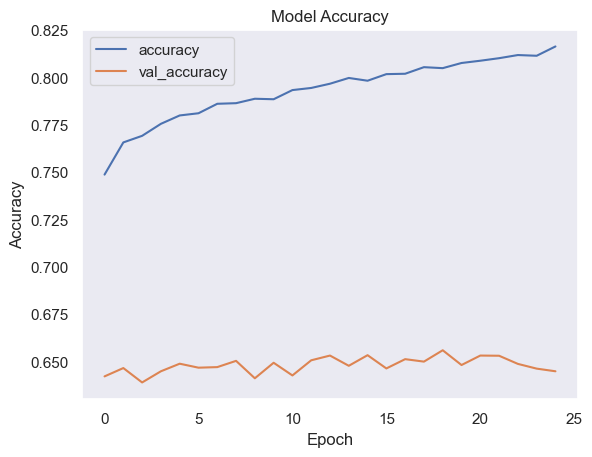

In [17]:
sns.lineplot(history.history['accuracy'], label='accuracy')
sns.lineplot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.75      0.69      0.72      1000
  automobile       0.78      0.69      0.74      1000
        bird       0.61      0.41      0.49      1000
         cat       0.42      0.53      0.47      1000
        deer       0.55      0.65      0.60      1000
         dog       0.55      0.51      0.53      1000
        frog       0.74      0.71      0.72      1000
       horse       0.72      0.68      0.70      1000
        ship       0.73      0.81      0.77      1000
       truck       0.67      0.77      0.72      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



Text(0.5, 1.0, 'Confusion Matrix')

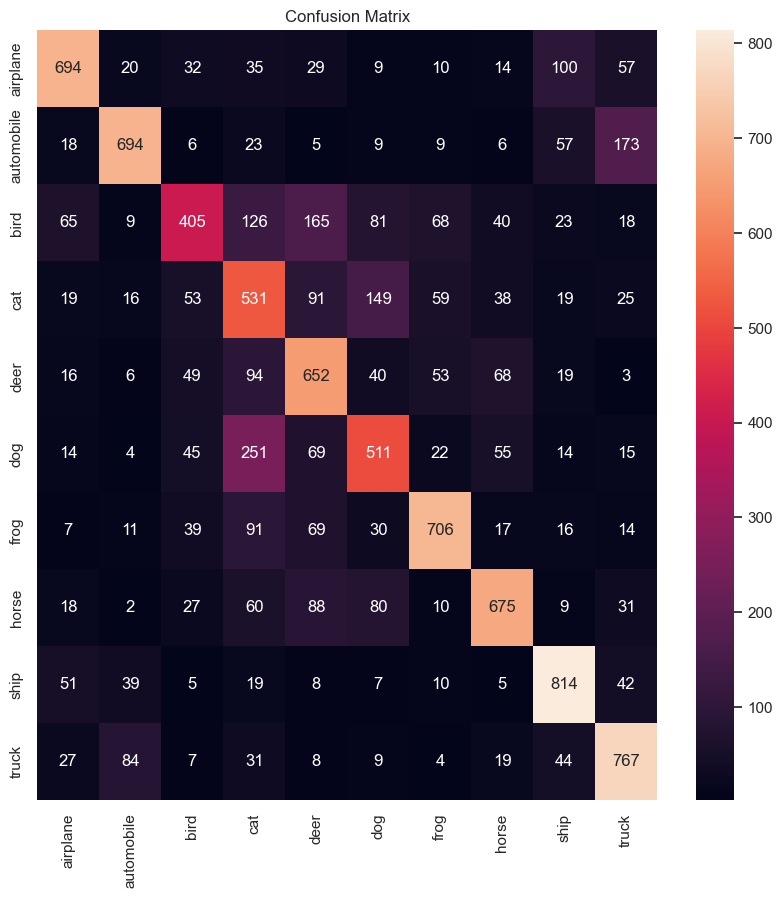

In [18]:
from sklearn.metrics import classification_report, confusion_matrix


pred = classification_model.predict(x_test)

y_pred = np.argmax(pred, axis=1)

print(classification_report(y_test, y_pred, target_names=label_names))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))

sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names)

plt.title('Confusion Matrix')

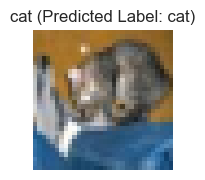

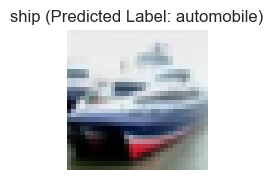

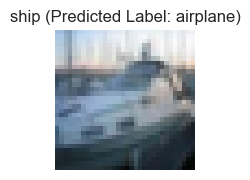

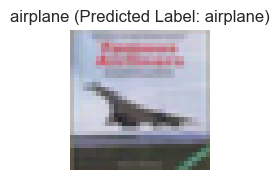

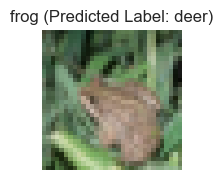

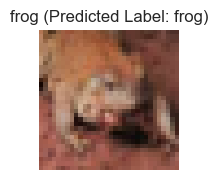

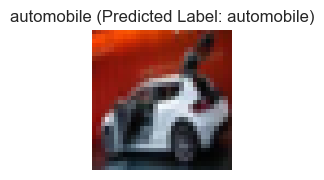

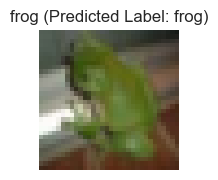

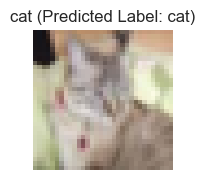

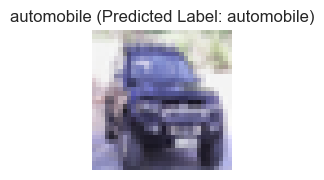

In [21]:
#plot images and their labels

n_images = 10

for i in range(n_images):
    plt.figure(figsize=(30, 4))
    # Display original images
    ax = plt.subplot(2, n_images, i+1)
    plt.imshow(x_test[i])
    plt.title(label_names[y_test[i][0]] + ' (Predicted Label: '+label_names[y_pred[i]]+')')
    plt.axis('off')

    plt.axis('off')
    
    
    plt.show()